# <center>Diving deep with Imbalanced Data</center>

Learn the techniques to deal with an imbalanced dataset.

Consider the following situation - 

You are working on your dataset. You create a classification model and get 90% accuracy immediately. The results seem fantastic to you. You dive a little deeper and discover that almost entirety of the data belongs to one class. Damn! Imbalanced data can cause you a lot of frustration.

You feel very frustrated when you discovered that your data has imbalanced classes and that all of the great results you thought you were getting turn out to be a lie. What is even more frustrating is the good books don't even cover this topic in a holistic manner.

This is an example of a situation cases by an **imbalanced** dataset and the frustrating results it can cause.

In this tutorial, you will discover the techniques that you can use to deliver good results on datasets with imbalanced data. Specifically, you will cover:

- What is imbalanced data?
- Challenges faced with imbalanced datasets
- various approaches for handling imbalanced data
- Further reading on the topic

Let's first see what is imbalanced data.

## What is imbalanced data?

Imbalanced data typically refers to classification tasks where the classes are not represented equally.

For example, you may have a binary classification problem with 100 instances out of which 80 instances are labeled with Class-1 and the remaining 20 instances are labeled with Class-2.

This is an example of an imbalanced dataset and the ratio of Class-1 to Class-2 instances is 4:1.

You can have a class imbalance problem on binary classification problems as well as multi-class classification problems. You will study the techniques to combat the both. Basically, the techniques that are used to deal with class-imbalance problem in a binary classification problem can easily be extended to that of a multi-class classification problem. 

The following image is also a representative of imbalanced data - 

<img src = "https://www.kdnuggets.com/wp-content/uploads/imbalanced-data-1.png"></img>

[Source]("https://www.kdnuggets.com/wp-content/uploads/imbalanced-data-1.png")

Be it a Kaggle competition or real test dataset, class imbalance problem is one of the most common ones. 

Most of the real-world classification problems display some level of class imbalance, which happens when there are not sufficient instances of the data that correspond to either of the class labels. Therefore, it is extremely important to properly choose the evaluation metric of your model. If it is not done then you might end up adjusting/optimizing an useless metric. In a real business-first scenario, this may lead to a complete waste. 

There are problems where a class imbalance is not just common, it is bound to happen. For example, in datasets that characterize fraudulent transactions are imbalanced. Because almost all of transactions in those datasets will be in the “Not-Fraud” class and a very small minority will be in the “Fraud” class.

Another example is customer churn datasets, where the vast majority of customers stay with the service (the “No-Churn” class) and a small minority cancel their subscription (the “Churn” class).

Generally, it is considered to be a class imbalance problem when the ratio between distributions of the classes is 4:1 and so on.  

Let's now take a look at the challenges faced with imbalanced datasets.

## Challenges faced with imbalanced datasets:

One of the main challenges faced by the utility industry today is _electricity theft_. Electricity theft is the third largest form of theft worldwide. The concerned companies are rapidly employing advanced analytics and machine learning algorithms to identify consumption patterns that indicate theft.

However, one of the biggest rollicking blocks in the imbalance problem is the enormous data and its varied amounts of distributions. Fraudulent transactions are significantly lower than normal healthy transactions i.e. accounting it to around 1-2 % of the total number of observations. Therefore your goal should be to improve the identification of the rare minority class as opposed to achieving higher overall accuracy.

Some examples of imbalanced datasets: 
- Datasets to identify customer churn where a vast majority of customers will continue using the service. Specifically, Telecommunication companies where Churn Rate is lower than 2 %.
- Datasets to identify rare diseases in medical diagnostics etc.
- Natural Disaster like Earthquakes

Most of the classifiers will fail to detect the imbalance between the classes if they are not adjusted properly or if you do not choose the right metric to evaluate their performance. There are some specific approaches for dealing with these situations. 

Before studying the approaches, let's first learn about **Accuracy Paradox** which is very relevant for this topic.

### Accuracy paradox:

The accuracy paradox is the name for the exact situation in the introduction to this post.

"_It is the case where your accuracy measures tell the story that you have excellent accuracy (such as 90%), but the accuracy is only reflecting the underlying class distribution._" - [Machine Learning Mastery]("http://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/")

So one obvious question that you will ask to yourself is - 

**What is going on in your model when you train on an imbalanced dataset?**

As you might have guessed, the reason you get 90% accuracy on an imbalanced data (with 90% of the instances in Class-1) is because when your model is fed with this data and trained with conventional approaches it fails to see through this problem and its hypothesis learns to always predict “Class-1” and thereby achieves high _classification accuracy_.

This is best seen when using a simple rule based algorithm like _k-NN_. If you print out the rule in the final model you will see that it is very likely predicting one class regardless of the data it is asked to predict.

Instead, a fine tuned and more sophisticated method may achieve a lower accuracy, but it would have a substantially higher true positive rate (or recall), which is really the metric you should have chosen for dealing with the dataset.

Following sections will now cover some of the approaches for tackling imbalanced datasets. 

## Approaches for handling imbalanced data:

### Evaluation metric: 

Accuracy is not the only metric to use when you are working with an imbalanced dataset. You already have seen that it is misleading.

There are metrics that have been designed to present you a more uncovered story of your model when you trained it on an imbalanced dataset. Let's study them one by one. 

**Confusion matrix**: It is one of the standard evaluation metrics of a classifier's performance. It contains information about the actual and the predicted class.

<img src = "https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/03/16142827/ICP1.png"></img>

[Source]("https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/03/16142827/ICP1.png")

The table should be pretty self-explanatory. 

**Precision**: Precision is the number of True Positives divided by the number of True Positives and False Positives. Put another way, it is the number of positive predictions divided by the total number of positive class values predicted. It is also called the Positive Predictive Value (PPV).

Precision can be thought of as a measure of a classifier's *exactness*. A low precision can also indicate a large number of False Positives.

**Recall**: Recall is the number of True Positives divided by the number of True Positives and the number of False Negatives. Put another way it is the number of positive predictions divided by the number of positive class values in the test data. It is also called Sensitivity or the True Positive Rate.

Recall can be thought of as a measure of a classifier's *completeness*. A low recall indicates many False Negatives.

Now, you will go in a bit-more details about these two terms with an example. 

**An example illustrating Precision and Recall**:

The [breast cancer dataset](http://archive.ics.uci.edu/ml/datasets/Breast+Cancer) is a standard machine learning dataset. It contains 9 attributes describing 286 women that have suffered and survived breast cancer and whether or not breast cancer recurred within 5 years. Let's investigate this dataset to get you a real feel of the problem. 

The dataset concerns a binary classification problem. Of the 286 women, 201 did not suffer a recurrence of breast cancer, leaving the remaining 85 that did. 

Let's explore about the dataset more visually. 

In [2]:
import numpy as np
import pandas as pd

# Load the dataset into a pandas dataframe
data = pd.read_csv("breast-cancer.data",header=None)

# See the data
print(data.head(10))

                      0      1        2      3    4   5  6      7          8  \
0  no-recurrence-events  30-39  premeno  30-34  0-2  no  3   left   left_low   
1  no-recurrence-events  40-49  premeno  20-24  0-2  no  2  right   right_up   
2  no-recurrence-events  40-49  premeno  20-24  0-2  no  2   left   left_low   
3  no-recurrence-events  60-69     ge40  15-19  0-2  no  2  right    left_up   
4  no-recurrence-events  40-49  premeno    0-4  0-2  no  2  right  right_low   
5  no-recurrence-events  60-69     ge40  15-19  0-2  no  2   left   left_low   
6  no-recurrence-events  50-59  premeno  25-29  0-2  no  2   left   left_low   
7  no-recurrence-events  60-69     ge40  20-24  0-2  no  1   left   left_low   
8  no-recurrence-events  40-49  premeno  50-54  0-2  no  2   left   left_low   
9  no-recurrence-events  40-49  premeno  20-24  0-2  no  2  right    left_up   

    9  
0  no  
1  no  
2  no  
3  no  
4  no  
5  no  
6  no  
7  no  
8  no  
9  no  


The column names are numeric because you are using a partially preprocessed dataset. But if you are interested then you may refer to the following image:

<img src="https://image.ibb.co/gxW5Z9/Capture.jpg"></img>

[Source]("http://archive.ics.uci.edu/ml/datasets/Breast+Cancer")

Let's see a bar graph of the class distributions. 

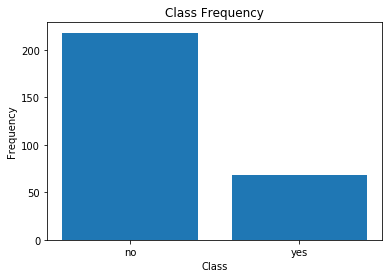

In [9]:
import matplotlib.pyplot as plt

classes = data[9].values
unique, counts = np.unique(classes, return_counts=True)

plt.bar(unique,counts)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

You can clearly see the class imbalance here. `yes` denotes the instances which have the cancer and as obvious the number of these instances is very small as compared to the instances corresponding the other class. 

False Negatives are probably worse than False Positives for this sensitive problem. More detailed screening can clear the False Positives, but False Negatives are sent home and lost to follow-up evaluation. 

Let's define "No Recurrences" and "Recurrences" event that are there in the dataset which will make things even more clear. 

- **All No Recurrence**: A model that only predicted no recurrence of breast cancer would achieve an accuracy of (201/286) * 100 or 70.28%. This is called <b>All No Recurrence</b>. This is a high accuracy, but a terrible model. If this model was misinterpreted, it would send home 85 women incorrectly thinking their breast cancer was not going to reoccur (High False Negatives).

- **All recurrence**: A model that only predicted the recurrence of breast cancer would achieve an accuracy of (85/286) * 100 or 29.72%. This is known <b>All Recurrence</b>. This model fails at producing good accuracy and would send home 201 women thinking that had a recurrence of breast cancer but this is really not the case (High False Positives).

This concept should spark an ignition inside you by now. Let's move forward with it. 

With respect to the concept of **confusion matrix** a perfect classifier would correctly predict 201 no recurrence and 85 recurrence which would be entered into the top left cell no recurrence/no recurrence (True Negatives) and bottom right cell recurrence/recurrence (True Positives).

But most of the time that's not the case. Let's see the two confusion matrices of All No Recurrence and All Recurrence:

**All No Recurrence**:
<img src = "https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2014/03/no_recurrence_confusion_matrix.png">
**All Recurrence**:
<img src = "https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2014/03/recurrence_confusion_matrix.png">

[Source](https://machinelearningmastery.com/classification-accuracy-is-not-enough-more-performance-measures-you-can-use/)

You can calculate the Precision and Recall easily now: 

**Precision**:
- The precision of the All No Recurrence model is 0/(0+0) or not a number, or 0.
- The precision of the All Recurrence model is 85/(85+201) or 0.30.

**Recall**:
- The recall of the All No Recurrence model is 0/(0+85) or 0.
- The recall of the All Recurrence model is 85/(85+0) or 1.

Well! You have now enough reasons as to wonder why considering only classification accuracy to evaluate your classification  model is not a good choice. 

Let's proceed to the next approach. 

### Resampling the dataset:

Dealing with imbalanced datasets includes various strategies such as improving classification algorithms or balancing classes in the training data (essentially a data preprocessing step) before providing the data as input to the machine learning algorithm. The later technique is preferred as it has wider application and adaptation. Moreover, the time taken to enhance an algorithm is often higher than to generate required samples. But for research purposes, both are preferred. 

The main idea of balancing classes is to either increasing the samples of the minority class or decreasing the samples of the majority class. This is done in order to obtain a fair balance in the number of instances for both the classes. 

This change is called _sampling_ and there are two main methods that you can use to even-up the classes:

- You can add copies of instances from the under-represented class called **over-sampling** (or more formally sampling with replacement), or
- You can delete instances from the over-represented class, called **under-sampling**.
These approaches are often very easy to implement and fast to run which makes these an excellent starting point.

In fact, it is advisable to always try both approaches on all of your imbalanced datasets, just to see if it gives you a boost in your preferred evaluation metrics.

Let's learn about over-sampling and under-sampling in a bit more detail.

#### Random Under-Sampling: 

Under-sampling aims to balance class distribution by randomly eliminating majority class examples.  This is done until the majority and minority class instances are balanced out. Let's consider the following example: 

Total Observations = 1000

Minority   Observations =20

Majority Observations = 980

Event Rate= 2% (which means out of a population of 1000 observations, only 20 observations will be minority)

In this case, you are taking 10 % samples without replacement from majority and combining them with minority instances.

Minority observations after random under-sampling = 10 % of 980 =98

Total Observations after combining them with minority observations = 20+98=118

Event Rate for the new dataset after under-sampling = 20/118 = 17%



**Advantages of this approach**:

- It can help improve runtime of the model and solve the memory problems by reducing the number of training data samples when the training data set is huge.

**Disadvantages**:
- It can discard useful information about the data itself which could be important for building rule-based classifiers such as Random Forests.
- The sample chosen by random under sampling may be a biased sample. And it will not be an accurate representative of the population. Thereby, resulting in inaccurate results with the actual test data set.
 

#### Random Over-Sampling:

Over-Sampling increases the number of instances in the minority class by randomly replicating them in order to present a higher representation of the minority class in the sample. Let's consider the following example:

Total Observations = 1000

Minority   Observations =20

Majority Observations = 980

Event Rate= 2%

In this case, you are replicating 20 minority observations   20 times.

Majority Fraudulent Observations = 980

Minority Observations after replicating the minority class observations= 400

Total Observations in the new dataset after over-sampling = 1380

New Event rate for the new data set after over-sampling= 400/1380 = 29%

**Advantages of random over-sampling**:
- Unlike under sampling this method leads to no information loss.

**Disadvantages**:
- It increases the likelihood of overfitting since it replicates the minority class events.

You consider the following factors while thinking of applying under-sampling and over-sampling:
- Consider applying under-sampling when you have a lot data
- Consider applying over-sampling when you don’t have a lot of data
- Consider applying random and non-random (e.g. stratified) sampling schemes.
- Consider applying different ratios of the class-labels (e.g. you don’t have to target a 1:1 ratio in a binary classification problem, try other ratios)

If you want to implement under-sampling and over-sampling in Python you should definitely check [`scikit-learn-contrib`](https://github.com/scikit-learn-contrib/imbalanced-learn). 

Now you will study the next approach for handling imbalanced data. 

### Trying out different perspectives:

There are fields of study dedicated to handling imbalanced datasets. They have their own algorithms, measures and terminology.

Often creativity and an innovative bent of mind can give you new perspectives to consider when you are dealing with imbalanced data. Therefore, following points are worth considering:
.

- **Anomaly detection** is the detection of rare events. In a simpler sense it is the process of identifying the samples that abnormally deviates from the standard deviation of the data. 

This shift in thinking considers the minor class as the outliers class which might help you think of new ways to separate and classify samples.

- **Change detection** is similar to anomaly detection except rather than looking for an anomaly it is looking for a change or difference for example a change in behavior of a user as observed by usage patterns or bank transactions.

Both of these approaches add a more real-time sauce to the classification problem that might give you some new ways of thinking about your problem and maybe some more techniques to try out.

The above approach can actually help you in playing between different domains and coming up with something new. It's always recommended to dig deeper in this. Anyway, you will now move onto the next and final approach of handling imbalanced data for this post:

### Try generating synthetic samples:
A simple way to generate synthetic samples is to randomly sample the attributes from instances in the minority class.

You could sample them empirically within your dataset or you could use a method like _Naive Bayes_ that can sample each attribute independently when run in reverse. You will have more and different data, but the non-linear relationships between the attributes may not be preserved.

There are systematic algorithms that you can use to generate synthetic samples. The most popular of such algorithms is called SMOTE or the **Synthetic Minority Over-sampling Technique**. It was proposed in 2002 and you can take a look at the [original SMOTE paper]("http://www.jair.org/papers/paper953.html"). Following info-graphic will give you a fair idea about the synthetic samples:

<img src = "https://cdn-images-1.medium.com/max/1600/1*uAiwqUNhqaSZmsXCrl9kVQ.png"></img>

[Source]("https://cdn-images-1.medium.com/max/1600/1*uAiwqUNhqaSZmsXCrl9kVQ.png")

SMOTE is an oversampling method which create “synthetic” example rather than
oversampling by replacements. The minority class is over-sampled by taking each minority class sample and
introducing synthetic examples along the line segments joining any/all of the k minority class nearest neighbors.
Depending upon the amount of over-sampling required, neighbors from the k nearest neighbors are randomly
chosen.

However, there are some advantages and disadvantages of SMOTE - 

**Advantages** - 
- Alleviates overfitting caused by random oversampling as synthetic examples are generated rather than replication of instances. 
- No loss of information.

**Disadvantages** - 
- While generating synthetic examples SMOTE does not take into consideration neighboring examples from other classes. This can result in increase in overlapping of classes and can introduce additional noise.
- SMOTE is not very effective for high dimensional data.

There are some variants of SMOTE such as safe level SMOTE, border line SMOTE, OSSLDDD-SMOTE etc. If you want to use SMOTE and its other variants you can check the `scikit-learn-contrib` module as mentioned before. If you want to learn more about SMOTE you check [this](sci2s.ugr.es/keel/keel-dataset/pdfs/2005-Han-LNCS.pdf) and [this](https://rd.springer.com/chapter/10.1007/978-3-642-01307-2_43) papers. 

### Wrap up!

So far, you got yourself introduced to the concept of imbalanced data and the kind of problem it creates while designing and developing machine learning models. You also saw several reasons as to why it is important to tackle imbalanced data. After that, you studied four different approaches that can help you to handle imbalanced datasets effectively. Handling imbalanced data is an active area of research and it can open new horizons for you to consider new research problems. 

A lot of important concepts in one go! Absolutely amazing!

That is all for this tutorial. In the next tutorial, you will actually implement some of the approaches in Python with a real-world dataset. 

Below are some paper links if you are very keen to study even more about the topic of imbalanced data:
- [Learning from Imbalanced Data]("http://ieeexplore.ieee.org/xpls/abs_all.jsp?arnumber=5128907")
- [Addressing the Curse of Imbalanced Training Sets: One-Sided Selection]("http://sci2s.ugr.es/keel/pdf/algorithm/congreso/kubat97addressing.pdf")
- [A Study of the Behavior of Several Methods for Balancing Machine Learning Training Data]("http://dl.acm.org/citation.cfm?id=1007735")

**References**:
- [Analytics Vidhya article on imbalanced data]("https://www.analyticsvidhya.com/blog/2017/03/imbalanced-classification-problem/")
- [Towards Data Science article on Imbalanced data]("https://towardsdatascience.com/dealing-with-imbalanced-classes-in-machine-learning-d43d6fa19d2")
- [Python Machine Learning]("https://g.co/kgs/a35QhF")

If you want to learn more about data visualization, take DataCamp's ["Interactive Data Visualization with Bokeh"](https://www.datacamp.com/courses/interactive-data-visualization-with-bokeh) taught by [Bryan Van de Ven](https://www.datacamp.com/instructors/bryanv) who is one of the developers of Bokeh. 